# OCR -> Text -> Translate -> Speech

This noteook is inspired by the following tutorial
https://www.youtube.com/watch?v=YttNmkuQYMg

In this notebook I am using pytesseract, a wrapper of Tesseract-OCR from Google to extract Telugu text from an image and translate that to English using googletrans package which uses Google Translate API for translation. Once the trsnlation is done, I am converting the translated text to speech using gtts package which call Google Text To Speech internally.

In [1]:
from IPython.display import Audio, display

import pytesseract

import cv2
from PIL import Image

from googletrans import Translator
from gtts import gTTS

In [2]:
def show_wait_destroy(winname, img):
    cv2.imshow(winname, img)
    cv2.moveWindow(winname, 500, 0)
    cv2.waitKey(0)
    cv2.destroyWindow(winname)

In [3]:
# If you don't have tesseract executable in your PATH, include the following:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

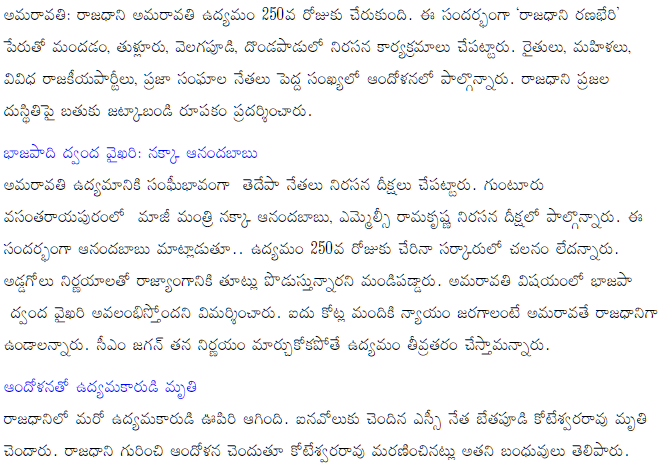

In [4]:
image_te = cv2.imread("telugu.png")
display(Image.fromarray(image_te))

## Extract the text from the image using pytesseract

In [5]:
text_te = pytesseract.image_to_string(image_te, lang = 'tel')
print(text_te)

అమరావతి: రాజధాని అమరావతి ఉద్యమం 250వ రోజుకు చేరుకుంది. ఈ సందర్భంగా 'రాజధాని రణభేరి"
పేరుతో మందడం, తుళ్లూరు, వెలగపూడి, దొండపాడులో నిరసన కార్యక్రమాలు చేపట్టారు. రైతులు, మహిళలు,
వివిధ రాజకీయపార్టీలు, ప్రజా సంఘాల నేతలు పెద్ద సంఖ్యలో ఆందోళనలో పాల్గొన్నారు. రాజధాని ప్రజల
దుస్థితిపై బతుకు జట్కాబండి రూపకం ప్రదర్శించారు.

భాజపాది ద్వంద వైఖరి: నక్కా ఆనందబాబు

అమరావతి ఉద్యమానికి సంఘీభావంగా తెదేపా నేతలు నిరసన దీక్షలు చేపట్టారు. గుంటూరు
వసంతరాయపురంలో మాజీ మంత్రి నక్కా ఆనందబాబు, ఎమ్మెల్సీ రామకృష్ణ నిరసన దీక్షలో పాల్గొన్నారు. ఈ
సందర్భంగా ఆనందబాబు మాట్లాడుతూ.. ఉద్యమం 250వ రోజుకు చేరినా సర్కారులో చలనం లేదన్నారు.
అడ్డగోలు నిర్ణయాలతో రాజ్యాంగానికి తూట్లు పొడుస్తున్నారని మండిపడ్డారు. అమరావతి విషయంలో భాజపా
ద్వంద వైఖరి అవలంభిస్తోందని విమర్శించారు. ఐదు కోట్ల మందికి న్యాయం జరగాలంటే అమరావతే రాజధానిగా
ఉండాలన్నారు. సీఎం జగన్‌ తన నిర్ణయం మార్చుకోకపోతే ఉద్యమం తీవ్రతరం చేస్తామన్నారు.

ఆందోళనతో ఉద్యమకారుడి మృతి
రాజధానిలో మరో ఉద్యమకారుడి ఊపిరి ఆగింది. ఐనవోలుకు చెందిన ఎస్సీ నేత బేతపూడి కోటేశ్వరరావు మృతి
చెందారు. రాజధా

### Create an instance of the translator and translate the text

In [6]:
translator = Translator()

### Detecting the language

In [7]:
print(translator.detect(text_te))

Detected(lang=te, confidence=1.0)


### Translate the text to English using Google Translate

In [8]:
text_en = translator.translate(text_te, src='te')
print(text_en.text)

Amravati: Amravati movement of capital has reached 250 per day. The 'capital ranabheri "
Mandadam name, tulluru, VELAGAPUDI, dondapadulo protest initiatives. Farmers, women,
Different political parties, leaders of the large number of public organizations took part in the protest. The capital of the
Dusthitipai life metaphor jatkabandi performed.

Bhajapadi duel attitude fox anandababu

TDP leaders carried out strikes in solidarity with the protest movement in Amravati. Guntur
Vasantarayapuranlo fox anandababu former minister, Ramakrishna MLC participated in a protest strike. The
Speaking on the occasion anandababu .. joins the movement of the government motion, there is 250 per day.
Podustunnarani addagolu said decisions undermined the constitution. BJP in Amravati
Avalambhistondani criticized the attitude of the duel. Amravati law to effect the capital of five million
Should. TRS chief to change his decision, will intensify the movement.

Fearing for the lives of activists
Other activ

### Convert the text to speech using Google Text To Speech

In [9]:
te_tts = gTTS(text_en.text)
te_tts.save('te_tts.mp3')
# Audio('te_tts.mp3', autoplay=True) # Don't delete
Audio('te_tts.mp3')

Audio is converted to Indian accent and lang='hi' means Hindi

In [10]:
te_tts = gTTS(text_en.text, lang='hi')
te_tts.save('te_tts.mp3')
Audio('te_tts.mp3')

Audio is converted to Japanese accent

In [11]:
te_tts = gTTS(text_en.text, lang='ja')
te_tts.save('te_tts.mp3')
# Audio('te_tts.mp3', autoplay=True)
Audio('te_tts.mp3')

Translating the text to Hindi by adding the dest='hi'

In [12]:
text_hi = translator.translate(text_te, src='te', dest='hi')
print(text_hi.text)

अमरावती: राजधानी के अमरावती आंदोलन प्रतिदिन 250 तक पहुँच गया है। 'राजधानी ranabheri "
Mandadam नाम, tulluru, वेलागापुदी, विरोध पहल dondapadulo। किसानों, महिलाओं,
विभिन्न राजनीतिक दलों, सार्वजनिक संगठनों की बड़ी संख्या के नेताओं के विरोध में भाग लिया। की राजधानी
Dusthitipai जीवन रूपक jatkabandi प्रदर्शन किया।

Bhajapadi द्वंद्वयुद्ध रवैया लोमड़ी anandababu

तेदेपा नेताओं अमरावती में विरोध आंदोलन के साथ एकजुटता में हमलों को अंजाम दिया। गुंटूर
Vasantarayapuranlo लोमड़ी anandababu पूर्व मंत्री रामकृष्ण एमएलसी एक विरोध हड़ताल में भाग लिया।
इस अवसर पर बोलते हुए anandababu .. मिलती सरकार गति के आंदोलन, वहाँ है प्रति दिन 250।
Podustunnarani addagolu निर्णय संविधान को कम आंका कहा। अमरावती में भाजपा
Avalambhistondani द्वंद्वयुद्ध के रवैये की आलोचना की। अमरावती कानून पचास लाख की राजधानी प्रभाव
चाहिए। टीआरएस प्रमुख अपने फैसले को बदलने के लिए, आंदोलन को तेज करेंगे।

कार्यकर्ताओं के जीवन के भय
अन्य कार्यकर्ताओं राजधानी में साँस लेने में बंद कर दिया। Kotesvararavu betapudi अनुसूचित जाति ainavoluku के

In [13]:
hi_tts = gTTS(text_hi.text, lang='hi')
hi_tts.save('hi_tts.mp3')
Audio('hi_tts.mp3')

Translating the text to French by adding the dest='fr'

In [14]:
text_fr = translator.translate(text_te, src='te', dest='fr')
print(text_fr.text)

Amravati: mouvement Amravati du capital a atteint 250 par jour. Les « ranabheri de capital"
nom Mandadam, tulluru, VELAGAPUDI, dondapadulo initiatives de protestation. Les agriculteurs, les femmes,
Les différents partis politiques, les dirigeants du grand nombre d'organismes publics ont participé à la manifestation. Le capital de la
métaphore vie Dusthitipai jatkabandi réalisée.

duel Bhajapadi l'attitude fox anandababu

TDP dirigeants ont mené des opérations en solidarité avec le mouvement de protestation à Amravati. Guntur
Vasantarayapuranlo fox anandababu ancien ministre, Ramakrishna MLC a participé à une grève de protestation. le
Prenant la parole à l'occasion anandababu .. rejoint le mouvement de la motion du gouvernement, il est de 250 par jour.
addagolu Podustunnarani lesdites décisions sapé la constitution. BJP dans Amravati
Avalambhistondani a critiqué l'attitude du duel. le droit Amravati pour effectuer le capital de cinq millions
Devrait. TRS chef pour changer sa décision, v

In [15]:
fr_tts = gTTS(text_fr.text, lang='fr')
fr_tts.save('fr_tts.mp3')
Audio('fr_tts.mp3')

English Text To Speech

In [16]:
te_en = """Telugu is a Dravidian language spoken by Telugu people predominantly living in the 
Indian states of Andhra Pradesh, Telangana and Yanam district of Puducherry, where it is also the official language. 
It stands alongside Hindi and Bengali as one of the few languages with primary official language status in more than one Indian state.
Telugu is also a linguistic minority in the states of Odisha, Karnataka, Tamil Nadu, Kerala, Chhattisgarh, Maharashtra and Andaman and Nicobar Islands. 
It is one of six languages designated a classical language of India by the country's government.
Telugu ranks fourth among the languages with the highest number of native speakers in India, with nearly 82 million speakers as per the 2011 census, and 15th in the Ethnologue list of languages by number of native speakers. 
It is the most widely spoken member of the Dravidian language family and one of the twenty-two scheduled languages of the Republic of India.
It is also the fastest-growing language in the United States, where there is a large Telugu-speaking community.
Roughly 10,000 pre-colonial inscriptions exist in the Telugu language"""

In [17]:
te_en_tts = gTTS(te_en, lang='hi')
te_en_tts.save('te_en_tts.mp3')
Audio('te_en_tts.mp3')